# Clase 8: Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/reg_data.csv")


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [7]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


In [8]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [9]:
df.dropna(inplace=True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


1. Is there any relationship between Age and Salary. (Salary depends on Age?)

Salary = b0 + b1 * Age |
y = c + mx |
b0 ->  c -> y intercept |
b1 -> pendiente/slope |

In [10]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [14]:
print('The y intercept ', model_lm.intercept_)
print('The coeff. of Age ', model_lm.coef_)
print('The R^2 values is ' , model_lm.score(x,y))

The y intercept  [349.44580104]
The coeff. of Age  [[48.09321584]]
The R^2 values is  0.380484541757693


In [38]:
modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:16:14   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Salary = b0 + b1 * age
# Salary of a person with age = 33

In [40]:
salary = 349.4458 + 48.0932 * 33

print('Predicted salary of person with age 33 is, ', salary)

Predicted salary of person with age 33 is,  1936.5214


In [41]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [42]:
res0 = 1500 - 1936.5214
res1 = 1200 - 1936.5214
print('residual values of first two data are: ', res0, '\t', res1)

residual values of first two data are:  -436.5214000000001 	 -736.5214000000001


In [43]:
RESI_A = resultA.resid
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

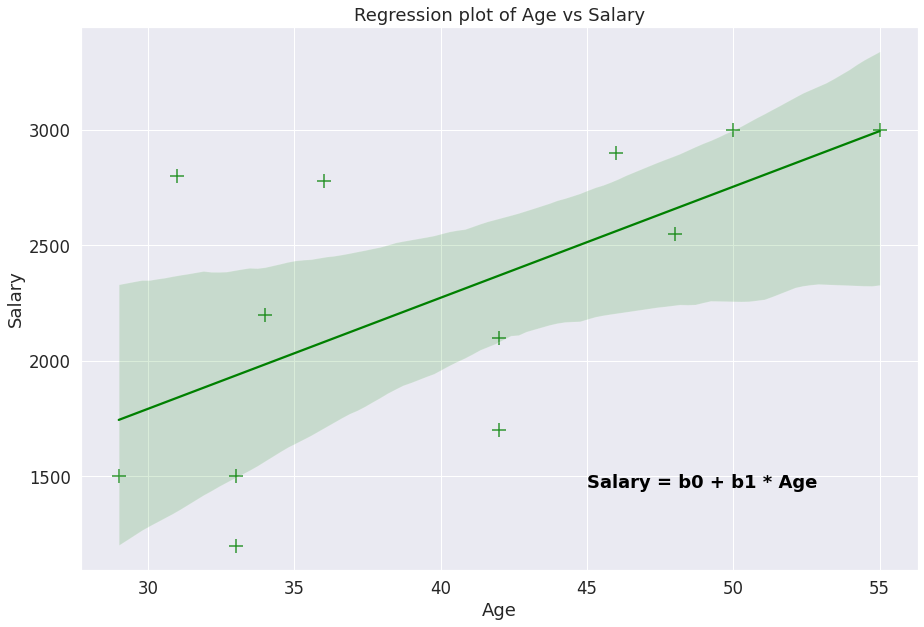

In [51]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df,
                 color = 'green',
                 marker= '+',
                 scatter_kws = {'s': 200},
                )
ax.set(xlabel = 'Age', ylabel = 'Salary')
ax.text(45,1450, 'Salary = b0 + b1 * Age', 
        horizontalalignment = 'left', size = 'medium', color = 'black', weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

In [52]:
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

In [53]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


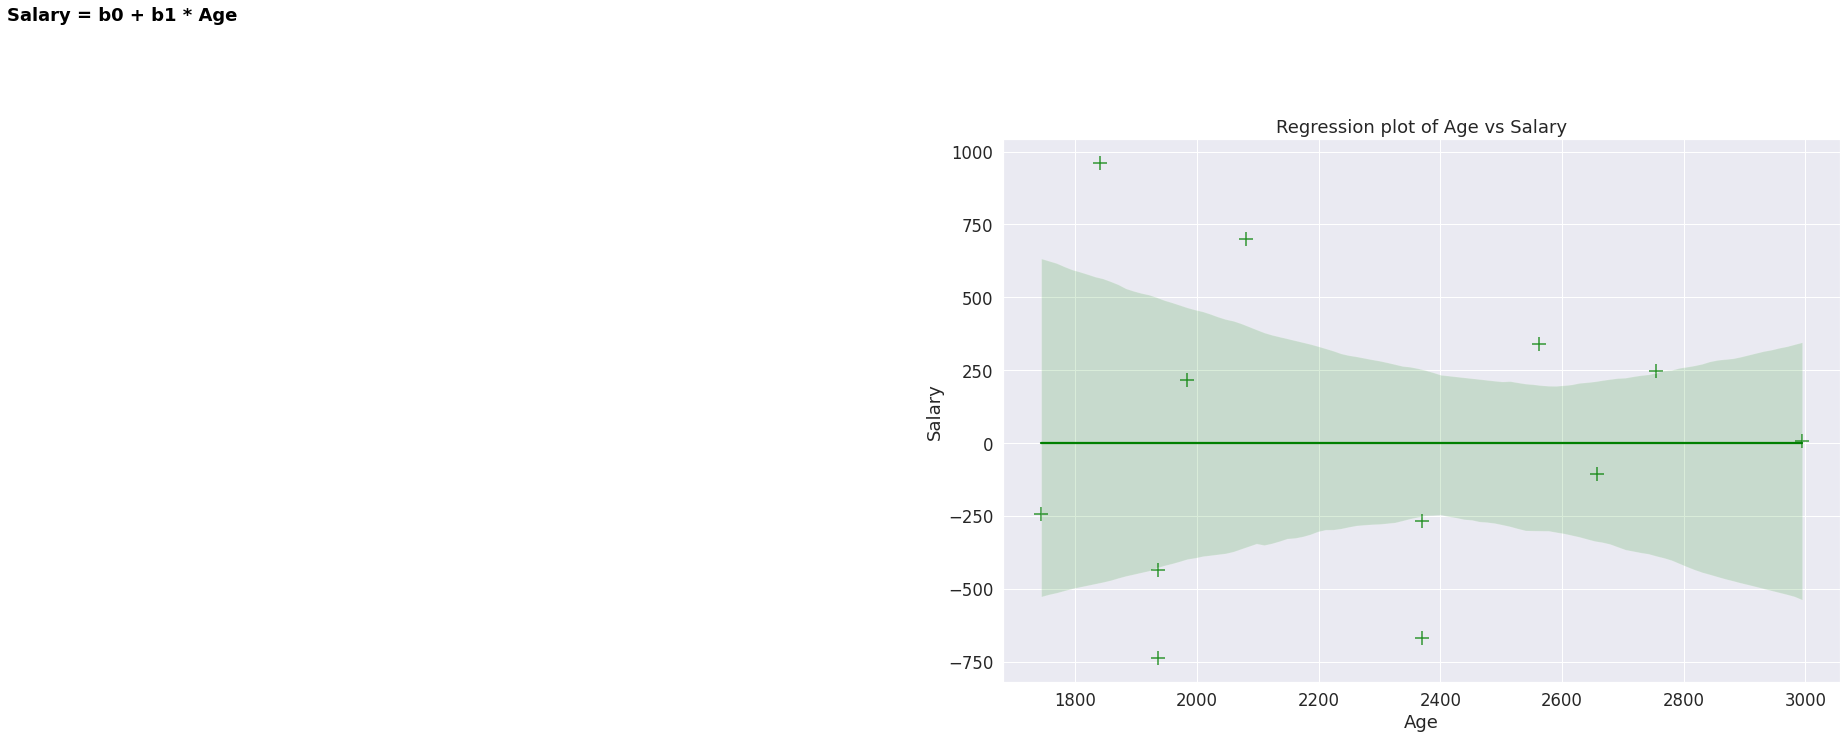

In [54]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                 y = RESI_A,
                 data = df,
                 color = 'green',
                 marker= '+',
                 scatter_kws = {'s': 200},
                )
ax.set(xlabel = 'Age', ylabel = 'Salary')
ax.text(45,1450, 'Salary = b0 + b1 * Age', 
        horizontalalignment = 'left', size = 'medium', color = 'black', weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

In [56]:
modelA = sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:37:40   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### salary = b0 + b1 * Age + b2 * (G_male + G_female)
### Salary = 749.8157 + 34.2211 * Age + 306.7169* Gender[T.MALE]

In [58]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


What is the salary of a male with age 42?

In [61]:
print('What is the salary of a male with age 42? ', 749.8157 + 34.2211 * 42 + 306.7169 * 1)
print('What is the salary of a female with age 42? ', 749.8157 + 34.2211 * 42 + 306.7169 * 0)

What is the salary of a male with age 42?  2493.8188
What is the salary of a female with age 42?  2187.1019
